# Dependencies & Setup

In [2]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python matplotlib --upgrade tensorboard keras

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.6/7.6 MB 8.3 MB/s eta 0:00:00
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)


In [3]:
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
ale-py                        0.7.4
altair                        5.0.1
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
AutoROM                       0.6.1
AutoROM.accept-rom-license    0.6.1
Babel 

In [8]:
import tensorflow as tf
import os

In [9]:
# Avoid out-of-memory (OOM) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')

# Keep the memory to a minimum
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Remove Dodgy Images

In [29]:
import cv2
# Check file extensions
import imghdr
from matplotlib import pyplot as plt

In [20]:
data_dir = 'data'

In [21]:
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']

In [17]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_34134495_M4bLtlnlfGyEk0ZwOn2fB7ul4D1vvy57.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile-svg_-png.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-r.jpeg',
 '2560px-Happy_People.jpg',
 '2d5e8301-images_habits-of-happy-people-cr3.jpg',
 '35438_hd.jpg',
 '427394C200000578-0-image-a-24_1500384481554.jpg',
 '56f455011e0000b300705475.jpeg',
 '5796006cdd0895e1538b4bce.png',
 '5UZxAV4tKzVyH1hfRG6OV7ggFeXJlK-tScMcpTzDsxv4BZzKDNL0Kb30ZAlS.png',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '960x0.jpg',
 '963e7b757288cc01475f463bd63e6e1c.jpeg',
 'afro-girl-enjoying-the-sea-idyll-royalty-free-image-16611863.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog-2.jpeg',
 'bmjXGN_X6jx03RWmEJqFrdwiSX6yXwforkrCvStqW0N3aLty6r7dmAmPD5-5.jpeg',
 'cartoon-illustration-hugging-happy-people-260nw-101267275.jpg'

In [27]:
# NumPy Array
img = cv2.imread(os.path.join('data','happy','photo-1542596594-649edbc13630.jpeg'))

In [28]:
img.shape

(5146, 3431, 3)

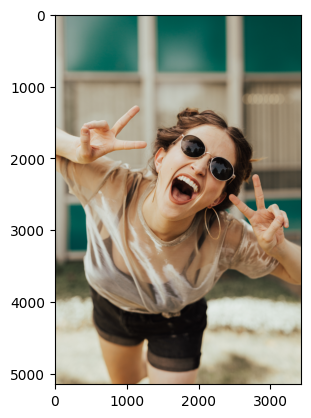

In [33]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Gets rid of that extra line with code above
plt.show()

In [35]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            if tip not in image_extensions:
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Load Data

In [37]:
# Build a pipeline that can be repeated
tf.data.Dataset??

In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
tf.keras.utils.image_dataset_from_directory??

In [42]:
# Keras data pipeline helper file that builds an image dataset for us as well as preprocessing (resizing them)
data = tf.keras.utils.image_dataset_from_directory('data')

Found 175 files belonging to 2 classes.


In [44]:
# Grab the data by converting it to a numpy iterator
data_iterator = data.as_numpy_iterator()

In [45]:
# Access the pipeline
data_iterator

In [60]:
# Grab a batch from the iterator
# Run this to keep getting new images for the plt
batch = data_iterator.next()

In [61]:
# 1: Images
# 2: Label that depicts class as happy or sad (0 or 1)
len(batch)
batch
batch[0].shape
batch[1]

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

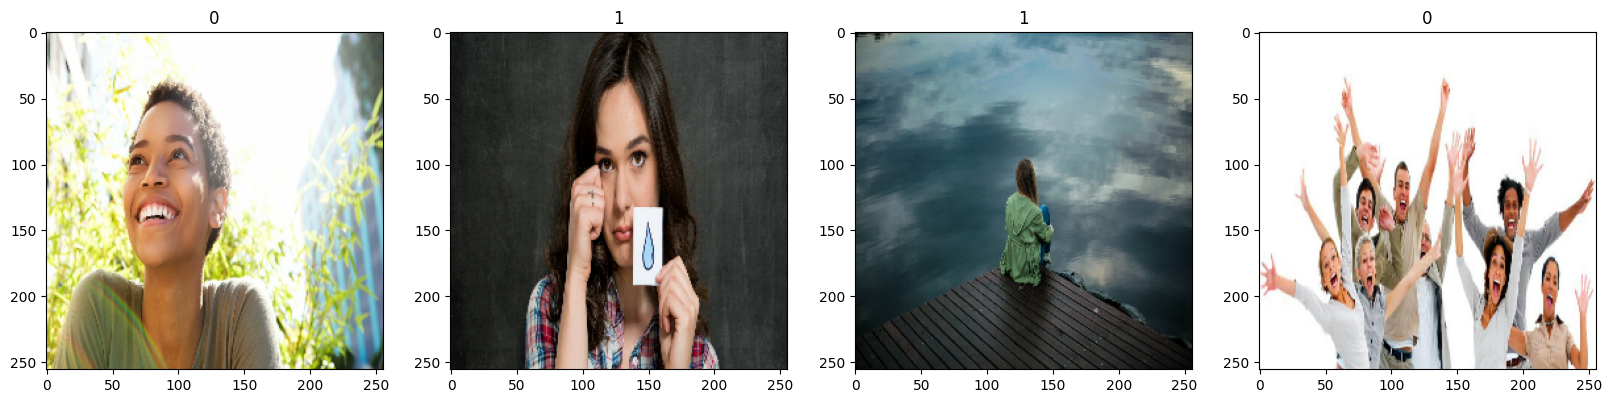

In [62]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

# Split Data

# Build Deep Learning Model

# Train Model

# Plot Performance

# Evaluate Model

# Test Model

# Save Model